In [1]:
from function_memoire import *

In [2]:
batch_size = 1000

# NCE for a 1D distribution

Data $X \sim  N(m,s)$

Noise $Y \sim  Q = \mu +\sigma N(0,1)$ with $\mu, \sigma$ fixed (in the code it is fixed at mu_unit and sigma_init)

# I) Preliminaries: several experiments to show NCE works.

## A. Data distribution's impact on NCE : $\mu_{data}=0$ , $\sigma_{data}=1$

### The noise which comes from the data distribution

In [3]:
mu_data , sigma_data = 0 , 1
mu_noise , sigma_noise = 1 , 2

true_c= 1/(sqrt(2*pi)*sigma_data)**2 # true value of the constant

batch_size=1000 #Size of the data (recall: the size of the noise is equal to: nu*batch_size)

Error_quad = [] # List to stock  estimator's quadratic error
Variance = [] #List to stockestimator's variance 

for i in range(100):
    
    X = random.normal(mu_data, sigma_data, batch_size)
    Estim_c = []
    
    for j in range(100):
        
        grad=NCEDescent1D(X, batch_size, mu_data, sigma_data,mu_noise , sigma_noise, nu=1)
        Estim_c.append(grad.cte)
        
    x = np.mean((np.array(Estim_c) - true_c)**2) #Quadratic error's computation
    Error_quad.append(x)
    
    Variance.append(np.var(Estim_c)) # Estimator's variance computation
    
    

        
    

In [4]:
table=[["Estimator's Quadratic error average =",np.mean(Error_quad)],["Estimator variance's average",np.mean(Variance)] ]
print("=============== Data distribution's impact on estimation for 100 iteration ===============")
print(tabulate(table))

=============== Data distribution's impact on estimation for 100 iteration ===============
-------------------------------------  -----------
Estimator's Quadratic error average =  0.0576045
Estimator variance's average           7.25777e-05
-------------------------------------  -----------


##### Remarks:

* Estimator's variance and  quadratic error average for 100 iterations are very low. Then  NCE is not sensitive to data distribution.
* It confirms the perturbation which can occur during our analysis is not provided by the dataset.


## B. Lets experiment NCE with different values of $\mu_{data}, \sigma_{data} , \mu_{noise}, \sigma_{noise}$ 

### noise = data:

In [5]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 5,10

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

true_c= 1/(sqrt(2*pi)*sigma_data) # True constant's value

Estim = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim.append(C.cte)
    
Quad_err =np.mean((np.array(Estim) - true_c)**2) 
Bias=np.mean(Estim) - true_c
Variance= np.var(Estim)
    

In [6]:
C=NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
print((C.std)**2)
print(Variance)

0.001999999999999996
0.0


### Noise distribution's parameters quite similars to those of data  

In [7]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 3,8

true_c1= 1/(sqrt(2*pi)*sigma_data) # True constant's value

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

Estim1 = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim1.append(C.cte)
    
Quad_err1 =np.mean((np.array(Estim1) - true_c1)**2) 
Bias1=np.mean(Estim1) - true_c
Variance1= np.var(Estim1)


In [8]:
C=NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
print((C.std)**2)
print(Variance1)

0.0020692761827271534
2.749167685714149e-08


### Noise distribution's parameters very differents to those of data

In [9]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 1,1

true_c2= 1/(sqrt(2*pi)*sigma_data) # True constant's value

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

Estim2 = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim2.append(C.cte)
    
Quad_err2 =np.mean((np.array(Estim2) - true_c2)**2) 
Bias2=np.mean(Estim2) - true_c
Variance2= np.var(Estim2)

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid 

In [10]:
Quad_err2 

inf

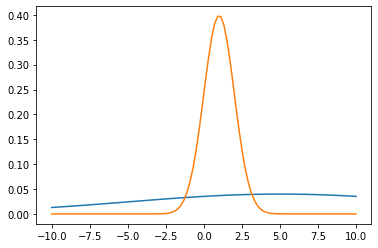

In [11]:
x =np.linspace(-10,10,100)
plt.plot(x, norm.pdf(x, 5,10) )
plt.plot(x, norm.pdf(x,1,1) )

### Noise and Data not belonging to same ditribution family ( noise$\sim$ T(5))

In [12]:
mu_data, sigma_data  = 5,10
n = 5 # degrees of freedom for the student law

true_c3= 1/(sqrt(2*pi)*sigma_data)**2 # True constant's value

X = random.normal(mu_data, sigma_data, batch_size)

Estim3 = []

for i in range(100):
    
    C = NCEDescent1D_T(X, batch_size, mu_data, sigma_data, n , nu=1)
    Estim3.append(C.cte)
    
Quad_err3 = np.mean((np.array(Estim3) - true_c3)**2) 
Bias3 = np.mean(Estim3) - true_c
Variance3 = np.var(Estim3)

In [13]:
print(true_c)

0.039894228040143274


In [14]:
Table=[["True value", true_c],["Mean", np.mean(Estim)],["Estimator's Quadratic error ", Quad_err],["Estimator variance's ",Variance],
       [ "Estimator's Bias", Bias] ,["Normalized Bias", Bias/true_c]]
table1=[["True value", true_c1],["Mean", np.mean(Estim1)],["Mean Square Error ", Quad_err1],["Variance ",Variance1],
       [ "Estimator's Bias", Bias1],["Normalized Bias", Bias1/true_c1] ]
table2=[["True value", true_c2],["Mean", np.mean(Estim2)],["Mean Square Error ", Quad_err2],["Variance ",Variance2],
       [ "Bias", Bias2],["Normalized Bias", Bias2/true_c2] ]
table3=[["True value", true_c3],["Mean", np.mean(Estim3)],["Mean Square Error", Quad_err3],["Variance ",Variance3],
       [ "Bias", Bias3],["Normalized Bias", Bias3/true_c3]]
print("=====================  Case: data = noise  ===================== ")
print(tabulate(Table))
print("======= Case: noise's parameters slightly differents from data ======= ")
print(tabulate(table1))
print("======= Case: noise's parameters very differents from data ======= ")
print(tabulate(table2))
print("======= Case: noise's and data distribution not same family =======")
print(tabulate(table3))

=====================  Case: data = noise  ===================== 
---------------------------  -----------
True value                   0.0398942
Mean                         0.0398942
Estimator's Quadratic error  1.2326e-32
Estimator variance's         0
Estimator's Bias             1.11022e-16
Normalized Bias              2.78292e-15
---------------------------  -----------
======= Case: noise's parameters slightly differents from data ======= 
-----------------  -----------
True value         0.0398942
Mean               0.0399375
Mean Square Error  2.93676e-08
Variance           2.74917e-08
Estimator's Bias   4.33125e-05
Normalized Bias    0.00108568
-----------------  -----------
======= Case: noise's parameters very differents from data ======= 
-----------------  -----------
True value           0.0398942
Mean               inf
Mean Square Error  inf
Variance           nan
Bias               inf
Normalized Bias    inf
-----------------  -----------
======= Case: noise's and data

#### Remarks:
For all the cases we explored, We can remark NCE is precise: 
* Low Bias
* Low Variance
* Low MSE

More, execution time is low as gaussian law are easy to simulate.

#### Warning:

We cannot choose a $\mu_{noise}$ too far from $\mu_{data}$. Indeed in our logistic function appears the ratio: $\frac{ln(p_{data})}{ln(p_{noise})}$ where $p_{noise}$  and $p_{data}$ are respectively the noise and data pdf. Then noise pdf's support needs to bee larger than the one of the data to allow sigmoid to be defined. 
From an analytical background as we are dealing with two gaussians pdf no problems should occur because of their supports equal R. However, tails distributions collapse very quickly to zero depending on standard deviation's value. Therefore, due too numerical approximation, in practice our distributions behave as if their support are reduced to a "neigborhood" of the mean (again, depending on $\sigma$). Hence if we take $\mu_{noise}$
too far from $\mu_{data}$ our logistic function can take infinite value and so is not defined. This means we don't get any constant's estimation.

It's also the reason why we choose to take student distribution for the case: noise and data not belonging to the same distribution.

# II) Noise distribution's impact:

Gutmann shows that noise distribution has a non negligible impact on constant's estimation.
He advocates to choose a noise distribution which gathers the following features: 
* Easy to simulate
* With a large sample size
* Close to the Noise Distribution

First, lets see whats is the noise's sample size ( i.e $\nu$'s value on constant's estimation).
Then, we are going to see what is the of a close noise distribution to the data.

## A. Impact of $\nu=\frac{Noise\ sample\ size}{Data\ sample\ size}$ on the data

### Case 1: noise = data

In [15]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 0,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_c2=[] #list of estimators for each iteration
Var2=[]# list of estimators for each iteration
Quad_err_2=[] #list of quadratic error for each iteration
Bias_2 = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)
for i in x:

    for j in range(75): # 100 iteration of Gan
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_c2.append(C.cte)
    
    
    x = np.mean((np.array(Estim_c2)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_2.append(x)
    Var2.append(np.var(Estim_c2))
    Estim_c2 = []
    Bias_2.append(np.mean(Estim_c2)-true_c)
    

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


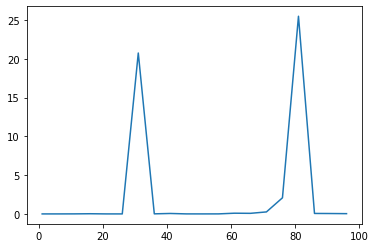

In [16]:
plt.plot(np.arange(1, 100 , 5), 10e24*np.array(Quad_err_2))

### Case 2: noise slightly different from data

In [17]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 4, 2 
n=20
batch_size = 1000

random.seed(5)

true_c= 1/(sqrt(2*pi)*sigma_data)**2

X = random.normal(mu_data, sigma_data, 1000)

x= np.arange(1, 100 , 5) #

Estim_c_1 = [] # list of the estimator
Var_1 = [] # list of the variance
Quad_err_1 = [] #list of the qudratic error
Bias_1 = [] # list of bias

for i in x:

    for j in range(75): # we run 75 times NCE
        C = NCEDescent1D_T(X,1000, mu_data, sigma_data, n , nu = int(i))
        Estim_c_1.append(C.cte)
    
    # we fill all the list described above
    x = np.mean((np.array(Estim_c_1) - true_c)**2)
    Quad_err_1.append(x)
    Var_1.append(np.var(Estim_c_1))
    Bias_1.append(np.mean(Estim_c_1)-true_c)
    # Wa empty the estimators' list in order to deal with an other iteration
    Estim_c_1 = []
    


[3.803534431024489e-07, 1.0587189187282186e-07, 5.8712813083335946e-08, 4.7019982713253207e-08, 3.230081548957153e-08, 2.9296473957565726e-08, 3.291982260877235e-08, 2.6667320312839723e-08, 1.7851817455268193e-08, 1.397021766292329e-08, 1.511466422257559e-08, 1.8696452202090477e-08, 1.1518996264616435e-08, 1.1512071376737422e-08, 1.0335321408151019e-08, 1.0988128814084717e-08, 1.1097990769171471e-08, 9.010306910562876e-09, 9.442236691966166e-09, 8.891524676868558e-09]


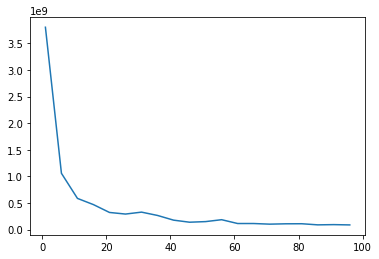

In [18]:
#plt.scatter( np.arange(1, 100 , 5) , 10e20*np.array(Var_1))
print(Var_1)
plt.plot( np.arange(1, 100 , 5) , 10e15*np.array(Var_1) )


###  Case 3 : Noise distribution's parameters very differents to those of data

In [19]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 6,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_c3=[] #list of estimators for each iteration
Var3=[]# list of estimators for each iteration
Quad_err_3=[] #list of quadratic error for each iteration
Bias_3 = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)
for i in x:
    
    for j in range(100):
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_c3.append(C.cte)
    
    
    x = np.mean((np.array(Estim_c3)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_3.append(x)
    Var3.append(np.var(Estim_c3))
    Bias_3.append(np.mean(Estim_c3)-true_c)
    Estim_c3 = []

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[0.4283056971657618, 0.05051282009960838, 0.031567413351607856, 0.02940409660676343, 0.020522716813833587, 0.016866976184588614, 0.014533396233689268, 0.013510593859531135, 0.01614952333402377, 0.01645506969153, 0.014281924102029785, 0.011657665064066038, 0.012591972007818263, 0.012003394864350958, 0.009718213645769282, 0.009465346721465295, 0.010367997864253164, 0.011089933171430448, 0.007333163146632568, 0.007471176779511324]


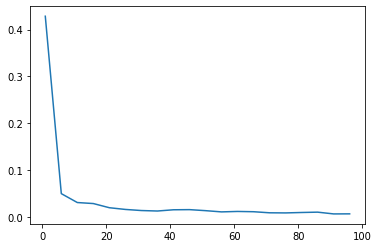

In [20]:
plt.plot(np.arange(1, 100 , 5), np.array(Quad_err_3))

print(Quad_err_3)

### Noise and Data not belonging to same ditribution family ( noise$\sim$ T(5))

In [21]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 0,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_cT=[] #list of estimators for each iteration
VarT=[]# list of estimators for each iteration
Quad_err_T=[] #list of quadratic error for each iteration
Bias_T = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)

for i in x:

    for j in range(100):
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_cT.append(C.cte)
    
    
    x = np.mean((np.array(Estim_cT)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_T.append(x)
    VarT.append(np.var(Estim_cT))
    Bias_T.append(np.mean(Estim_cT)-true_c)
    Estim_cT = []

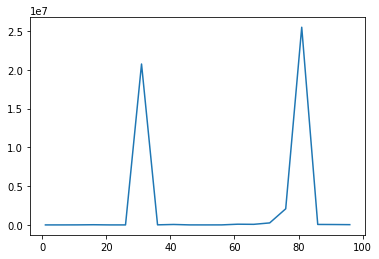

In [22]:
plt.plot(np.arange(1, 100 , 5), 10e30*np.array(Quad_err_T))

## B.  First criterion : Kullback-Liebler divergence between noise and data distributions

### Student Case:

In [23]:
mu_data , sigma_data = 0, 1
X=np.random.normal(0,1,1000)
random.seed(5)
true_c= 1/(sqrt(2*pi)*sigma_data)

Estim_t=[]
Variance_t=[]
Quad_err_t=[]

KL_t=[]

for i in np.linspace(4,60,30):
    
    for j in range(100):
        
        C = NCEDescent1D_T(X, len(X), mu_data,sigma_data, i, nu = 1)
        Estim_t.append(C.cte)
        
    Variance_t.append(np.var(Estim_t))
    Quad_err_t.append(np.mean((np.array(Estim_t) - true_c)**2))
    KL_t.append(kl_divergence(norm.pdf(X,0,1),pn_t(X,i)))


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """


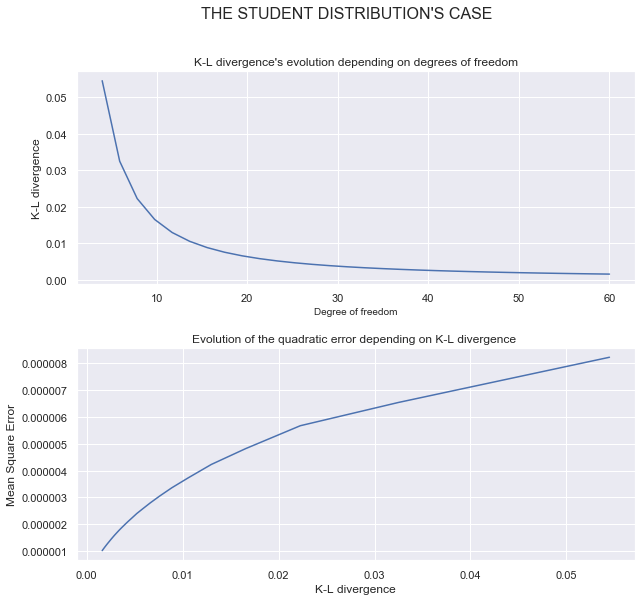

In [24]:
sns.set(style='darkgrid')
fig_t, axs_t = plt.subplots(2,figsize=(10,9), constrained_layout=True)
#fig_t.tight_layout()

fig_t.subplots_adjust(top=0.88,wspace = 0.2,hspace = 0.3)
fig_t.suptitle("THE STUDENT DISTRIBUTION'S CASE", size=16)

### Plot 1
axs_t[0].set_title("K-L divergence's evolution depending on degrees of freedom")
axs_t[0].set_xlabel("Degree of freedom",size=10)
axs_t[0].set_ylabel("K-L divergence")
axs_t[0].plot(np.linspace(4,60,30),KL_t)

### Plot 2
axs_t[1].set_title("Evolution of the quadratic error depending on K-L divergence ")
axs_t[1].set_xlabel("K-L divergence")
axs_t[1].set_ylabel("Mean Square Error")
axs_t[1].plot(KL_t,Quad_err_t)

#### Remarks:

* We know the student law convergence to a Gaussian ditribution as its degrees of freedom increase. This convergence ic characterized by the first graph.
* More we can see there is a positive correlation between KL-divergence and Quadratic error of the estimation. Thus we are tempted to say that in order to perform our estimation we need to choose a noise ditribution close to the data one. However we have to keep in mind the student case is particular as we have a convergence in law. Lets see what happens when we try to extend this assumption to others law such that gaussian one.

### Gaussian case

In [25]:
mu_data , sigma_data = 0,1
random.seed(5)
batch_size=1000

X = random.normal(mu_data, sigma_data, 1000)
KL_0 = []

L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)

for i in L_mu:
    
    for j in L_sigma:
        
        KL_0.append(kl_divergence((1/(sqrt(2*pi)*sigma_data))*pm0(X,mu_data,sigma_data),pn(X, i, j)))

KL=np.array(KL_0).reshape(len(L_mu),len(L_sigma))
def f_kl(i,k):
    return KL[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]


In [26]:
print(np.argmin(KL_0))
print(KL_0[105])

print(KL[4])
print(L_mu[4])
print(L_sigma[1])
X = random.normal(0, 1, 1000)
print(kl_divergence(norm.pdf(X,0,1),norm.pdf(X,L_mu[4],L_sigma[1])))
print((norm.pdf(X,0,1) * np.log(norm.pdf(X,0,1)/norm.pdf(X,L_mu[4],L_sigma[1]))).sum())

106
0.09381297046731917
[ 7.78333699e-01  9.38129705e-02 -3.91908728e-17  4.65658457e-02
  1.32968649e-01  2.29283346e-01  3.25276961e-01  4.17324220e-01
  5.04276086e-01  5.85965946e-01  6.62617954e-01  7.34598636e-01
  8.02309638e-01  8.66141760e-01  9.26456586e-01  9.83580713e-01
  1.03780568e+00  1.08939032e+00  1.13856403e+00  1.18553014e+00
  1.23046913e+00  1.27354157e+00  1.31489067e+00  1.35464447e+00
  1.39291787e+00  1.42981417e+00]
0
0.75
0.0989886266675202
-24.752010401346553


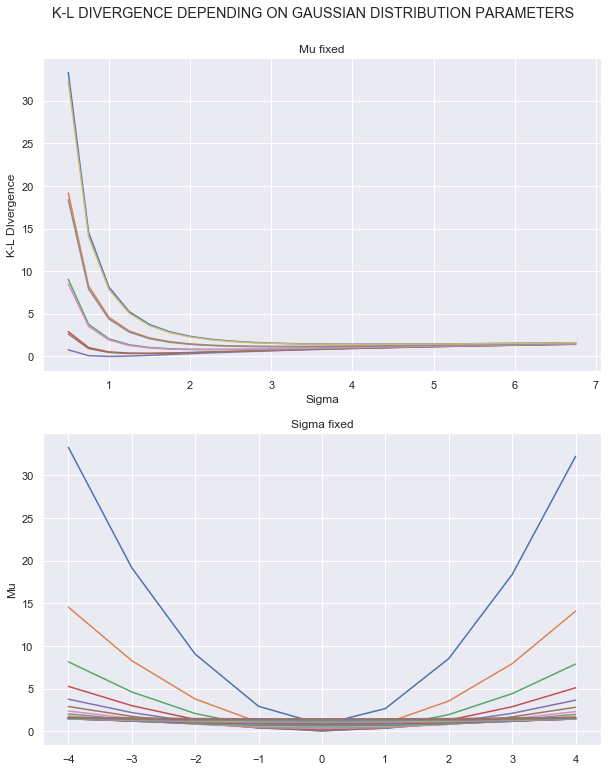

In [27]:
sns.set(style='darkgrid')

fig1, axs = plt.subplots(2, figsize=(10,12))

fig1.suptitle("K-L DIVERGENCE DEPENDING ON GAUSSIAN DISTRIBUTION PARAMETERS")
fig1.subplots_adjust(top=0.92)

axs[0].set_title('Mu fixed')
axs[0].set_ylabel('K-L DIvergence')
axs[0].set_xlabel('Sigma')
axs[0].plot(L_sigma,np.transpose(KL))

axs[1].set_title('Sigma fixed')
axs[1].set_ylabel('K-L DIvergence')
axs[1].set_ylabel('Mu')
axs[1].plot( L_mu , KL)

plt.show()

Text(0.5, 0, 'K-L Divergence')

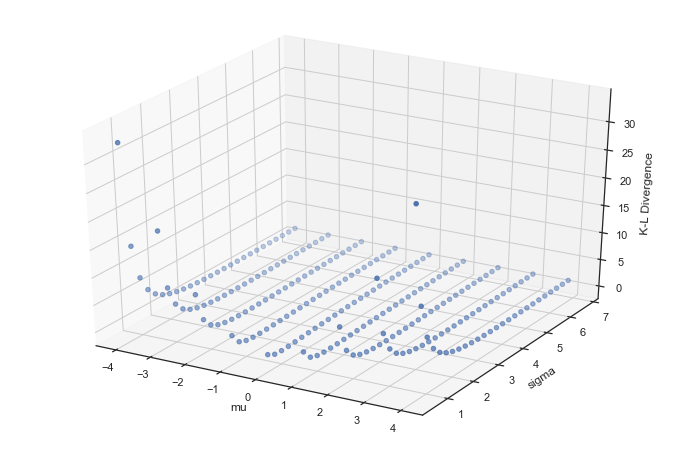

In [28]:
from mpl_toolkits import mplot3d

%matplotlib inline 

sns.set(style='white')

fig2 = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')


#for i in range(10):
xline = L_mu
yline = L_sigma
zline = [[f_kl(x,y) for x in xline] for y in yline]

xline, yline = np.meshgrid(xline, yline)

ax.scatter3D(xline, yline, zline, 'gray')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('K-L Divergence')

#ax.view_init(56, angle)
    

In [29]:
#mu =-5

mu_data, sigma_data = 0,1

estim = []
MSE = [] #erreur quadratique de la constante
true_c = 1/(sqrt(2*pi)*sigma_data)
KL_0 = []
Var_=[]

np.random.seed(5)

X = random.normal(mu_data, sigma_data, batch_size)



L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)

for k in L_mu:
    
    for i in L_sigma:
        
        print("MU =", k, "SIGMA=",i)
        
        for j in range(100):
            
            grad = NCEDescent1D(X, len(X), mu_data, sigma_data, k , i ,nu=1)
            estim.append(grad.cte)
            
        
        x = np.mean((np.array(estim) - true_c)**2)
        MSE.append(x)
        Var_.append(np.var(estim))
        pm = norm.pdf(X, mu_data, sigma_data)
        KL_0.append(kl_divergence(pm, pn(X, k, i)))
        
        estim=[]
        


MU = -4 SIGMA= 0.5


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


MU = -4 SIGMA= 0.75
MU = -4 SIGMA= 1.0
MU = -4 SIGMA= 1.25
MU = -4 SIGMA= 1.5
MU = -4 SIGMA= 1.75
MU = -4 SIGMA= 2.0
MU = -4 SIGMA= 2.25
MU = -4 SIGMA= 2.5
MU = -4 SIGMA= 2.75


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


MU = -4 SIGMA= 3.0
MU = -4 SIGMA= 3.25
MU = -4 SIGMA= 3.5
MU = -4 SIGMA= 3.75
MU = -4 SIGMA= 4.0
MU = -4 SIGMA= 4.25
MU = -4 SIGMA= 4.5
MU = -4 SIGMA= 4.75
MU = -4 SIGMA= 5.0
MU = -4 SIGMA= 5.25
MU = -4 SIGMA= 5.5
MU = -4 SIGMA= 5.75
MU = -4 SIGMA= 6.0
MU = -4 SIGMA= 6.25
MU = -4 SIGMA= 6.5
MU = -4 SIGMA= 6.75
MU = -3 SIGMA= 0.5
MU = -3 SIGMA= 0.75
MU = -3 SIGMA= 1.0
MU = -3 SIGMA= 1.25
MU = -3 SIGMA= 1.5
MU = -3 SIGMA= 1.75
MU = -3 SIGMA= 2.0
MU = -3 SIGMA= 2.25
MU = -3 SIGMA= 2.5
MU = -3 SIGMA= 2.75
MU = -3 SIGMA= 3.0
MU = -3 SIGMA= 3.25
MU = -3 SIGMA= 3.5
MU = -3 SIGMA= 3.75
MU = -3 SIGMA= 4.0
MU = -3 SIGMA= 4.25
MU = -3 SIGMA= 4.5
MU = -3 SIGMA= 4.75
MU = -3 SIGMA= 5.0
MU = -3 SIGMA= 5.25
MU = -3 SIGMA= 5.5
MU = -3 SIGMA= 5.75
MU = -3 SIGMA= 6.0
MU = -3 SIGMA= 6.25
MU = -3 SIGMA= 6.5
MU = -3 SIGMA= 6.75
MU = -2 SIGMA= 0.5
MU = -2 SIGMA= 0.75
MU = -2 SIGMA= 1.0
MU = -2 SIGMA= 1.25
MU = -2 SIGMA= 1.5
MU = -2 SIGMA= 1.75
MU = -2 SIGMA= 2.0
MU = -2 SIGMA= 2.25
MU = -2 SIGMA= 2.5
MU = -

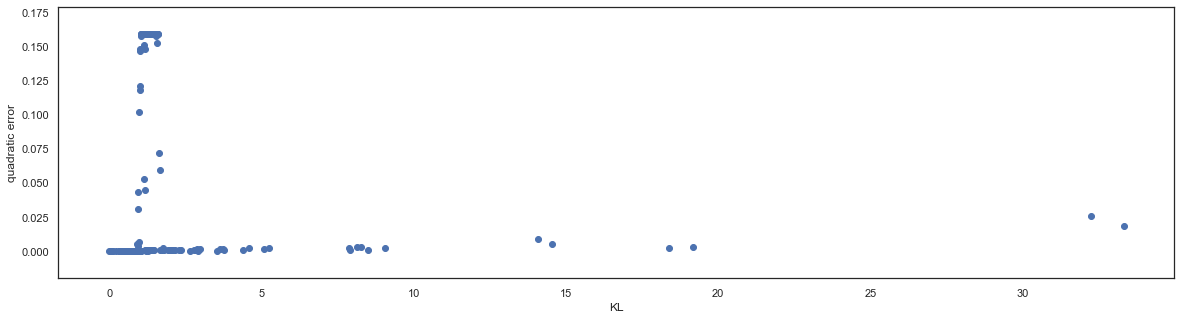

In [30]:
#KL_and_error = KL_0 + error_quad
KL_0_ord, error_ord = zip(*sorted(zip(KL_0, MSE)))

plt.figure(figsize=(20,5))
#plt.plot(KL_0_ord, error_ord)
plt.xlabel('KL')
plt.ylabel('quadratic error')
plt.scatter(KL_0_ord, error_ord)
plt.show()

In [31]:
L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)
MSE1=np.array(MSE).reshape(len(L_mu),len(L_sigma))
Var_1=np.array(Var_).reshape(len(L_mu),len(L_sigma))

def f_VAR(i,k):
    return Var_1[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]

def f_MSE(i,k):
    return MSE1[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]



Text(0.5, 0, 'Quadratic error')

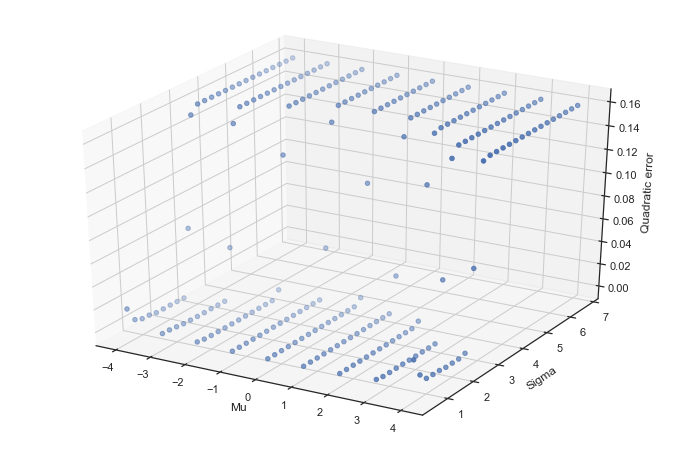

In [32]:
from mpl_toolkits import mplot3d

%matplotlib inline 

sns.set(style='white')

fig2 = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')


#for i in range(10):
xline = L_mu
yline = L_sigma
zline = [[f_MSE(x,y) for x in xline] for y in yline]

xline, yline = np.meshgrid(xline, yline)

ax.scatter3D(xline, yline, zline, 'gray')
ax.set_xlabel('Mu')
ax.set_ylabel('Sigma')
ax.set_zlabel('Quadratic error')

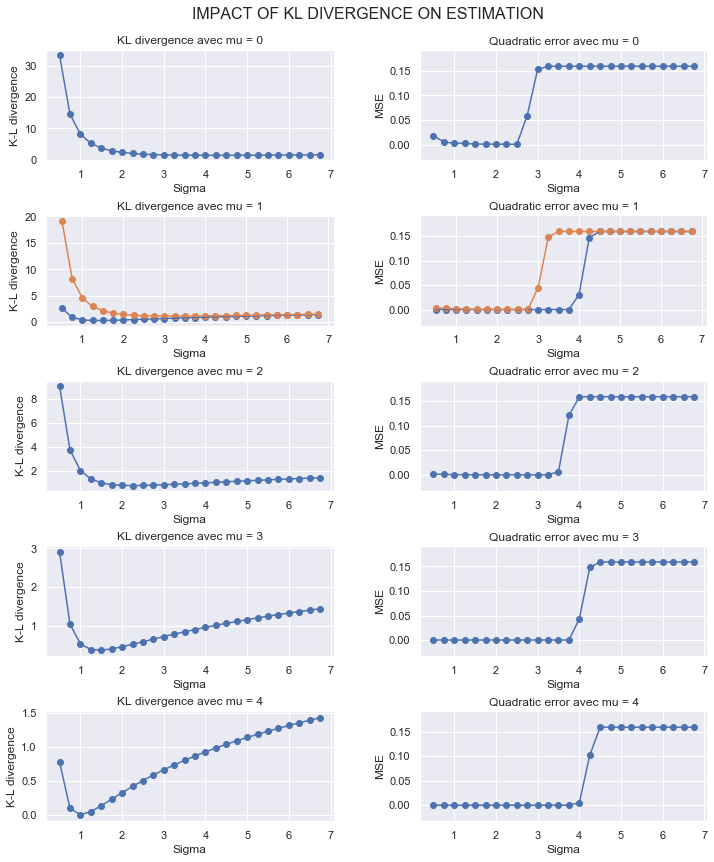

In [33]:
error_quad_bis1 = np.array(MSE1).reshape(len(L_mu),len(L_sigma))

sns.set(style="darkgrid")
opt1=[]
fig5, axs5 = plt.subplots(5,2,figsize=(10,12))
fig5.tight_layout()

j=0

for i in np.hstack((-4,np.arange(0,5,1))):
    
    axs5[i,0].set_title("KL divergence avec mu = "+ str(i))
    axs5[i,0].scatter(L_sigma,KL[i])
    axs5[i,0].plot(L_sigma,KL[i])
    axs5[i,0].set_xlabel('Sigma')
    axs5[i,0].set_ylabel('K-L divergence')

    
    axs5[i,1].set_title("Quadratic error avec mu = "+ str(i) )
    axs5[i,1].scatter( L_sigma,error_quad_bis1[i])
    axs5[i,1].plot( L_sigma,error_quad_bis1[i])
    axs5[i,1].set_xlabel('Sigma')
    axs5[i,1].set_ylabel('MSE')
    opt1.append(L_sigma[ np.argmin(error_quad_bis1[i,:10])])
    j=j+1

fig5.suptitle("IMPACT OF KL DIVERGENCE ON ESTIMATION", size=16)
fig5.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.5)
plt.show()



KL divergence doesn't necessarily seem to be a good criterion to find a better estimation quality as the above graph shows us

<function matplotlib.pyplot.show(*args, **kw)>

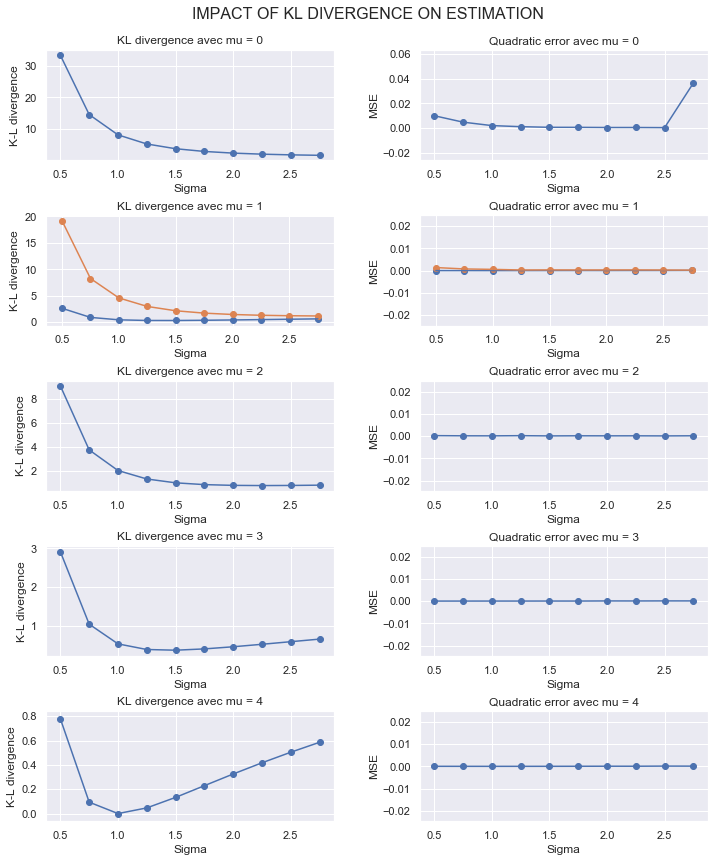

In [34]:
error_quad_bis1 = np.array(Var_).reshape(len(L_mu),len(L_sigma))

sns.set(style="darkgrid")
opt1=[]
fig, axs = plt.subplots(5,2,figsize=(10,12))
fig.tight_layout()

j=0

for i in np.hstack((-4,np.arange(0,5,1))):
    
    axs[i,0].set_title("KL divergence avec mu = "+ str(i))
    axs[i,0].scatter(L_sigma[:10],KL[i,:10])
    axs[i,0].plot(L_sigma[:10],KL[i,:10])
    axs[i,0].set_xlabel('Sigma')
    axs[i,0].set_ylabel('K-L divergence')

    
    axs[i,1].set_title("Quadratic error avec mu = "+ str(i) )
    axs[i,1].scatter( L_sigma[:10],error_quad_bis1[i,:10])
    axs[i,1].plot( L_sigma[:10],error_quad_bis1[i,:10])
    axs[i,1].set_xlabel('Sigma')
    axs[i,1].set_ylabel('MSE')
    opt1.append(L_sigma[ np.argmin(error_quad_bis1[i,:10])])
    j=j+1

fig.suptitle("IMPACT OF KL DIVERGENCE ON ESTIMATION", size=16)
fig.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.5)
plt.show



In [35]:
error_quad_bis1

array([[1.00852487e-02, 4.90018043e-03, 2.11283844e-03, 1.23898905e-03,
        7.31574426e-04, 6.96978521e-04, 5.69113733e-04, 5.72105628e-04,
        4.71317001e-04, 3.65160865e-02, 6.91760816e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.40596280e-03, 7.85131886e-04, 5.95148827e-04, 3.20099690e-04,
        3.54868311e-04, 3.29378553e-04, 3.35752179e-04, 3.47951427e-04,
        3.11694224e-04, 2.62374360e-04, 3.20067466e-02, 1.04247551e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.55201286e-04, 1.72266710e-04, 1.53187481e-04

In [36]:
estims=[]
random.seed(5)
X= np.random.normal(0,1,1000)
Vv=[]
eq=[]

for i in L_sigma:
    for j in range(75):
        grad = NCEDescent1D(X,1000,0,1,7,i,nu=1)
        estims.append(grad.cte)
        
    v=np.var(estims) 
    x = np.mean((np.array(estims) - true_c)**2)
    Vv.append(v)
    eq.append(x)
    estims=[]
    print(i)
        

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75


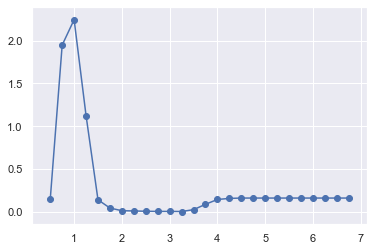

In [37]:
plt.plot(np.arange(0.5,7,0.25),eq)
plt.scatter(np.arange(0.5,7,0.25),eq)

In [38]:
estims=[]
random.seed(5)
X= np.random.normal(0,1,1000)
Vv1=[]
eq1=[]

for i in L_sigma:
    for j in range(75):
        grad1= NCEDescent1D(X,1000,0,1,6,i,nu=1)
        estims.append(grad.cte)
        
    v=np.var(estims) 
    x = np.mean((np.array(estims) - true_c)**2)
    Vv1.append(v)
    eq1.append(x)
    estims=[]
    print(i)

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75


ValueError: x and y must be the same size

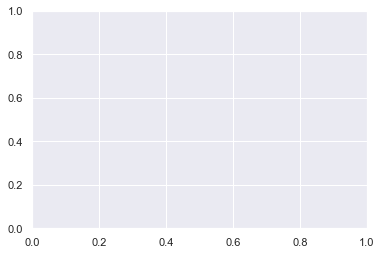

In [39]:
plt.scatter(np.linspace(0.3,4, 20),eq)
plt.plot(np.linspace(0.3,4, 20),eq)
plt.scatter(np.linspace(0.3,4,20),eq1)
plt.plot(np.linspace(0.3,4,20),eq1)

In [ ]:
X=np.random.normal(0,1,1000)
estim=[]
estim1=[]
Var_1=[]
MSE_bis=[]
MSE_bis1=[]

for i in range(50):
    #print(i)
    for j in range(75):
        grad1= NCEDescent1D(X, len(X), mu_data, sigma_data, 4 , 0.75,nu=1)       
        grad = NCEDescent1D(X, len(X), mu_data, sigma_data, 0 , 1,nu=1)
        estim.append(grad.cte)
        estim1.append(grad1.cte)
            
    y = np.mean((np.array(estim1)- true_c)**2)
    x = np.mean((np.array(estim) - true_c)**2)
    MSE_bis.append(x)
    MSE_bis1.append(y)
    Var_1.append(np.var(estim1))
    Var_.append(np.var(estim))



In [ ]:
plt.plot(range(50),MSE_bis)
plt.plot(range(50),MSE_bis1,'-r')

####  Remarques :

* NCE is a classification problem. Therefore it's more relevant to speak about "data proximity" rather than distribution one.

* This remark is enlighted by the graphs above. Indeed, we see that a low Kullback Lieber divergence does not implies a low Quadratic error. It seems at first sight disappointed. However, just remember NCE is based on logistic regression. So a high confusion  between data and noise makes discrimination between their realisations more difficult. Then, according to Gutman's intuition, it leads for discriminator to learn more about the two distributions. So a good way to get more information about data distribution and so about the constant value deals with "data proximity" rather than "Distribution proximity".
* information about Kullback lieber ( doesn't take in account distributions support)
* Let's compute the density of :

## B. NCE is a classification problem: Distance between data

In [ ]:
I= np.linspace(-5,20,100)
sns.set(style ="white")
np.random.seed(5)
fig_conf, axs_conf = plt.subplots(5,figsize=(15,22))

size_sample=1000
mu=7
L = np.random.normal(0,1,size_sample)
#fig.tight_layout()
fig_conf.suptitle(" Confusion between noise and data sets with mu = " + str(mu) + " and for "  +str(size_sample) +" simulations", size= 25)
fig_conf.subplots_adjust(top = 0.93,hspace=0.35)
L_sigma_reduced=[0.5,1,2,3,4]
j=0
for i in L_sigma_reduced:
    
    axs_conf[j].set_title("Sigma = "+str(i), size= 20)
    axs_conf[j].plot(I, norm.pdf(I,0,1), '-b', label='data')
    axs_conf[j].plot(I, norm.pdf(I,mu,i),'-y',label="noise")
    #axs[np.argwhere(L_sigma==i)[0][0]].plot(np.random.normal(3,i,16),[0]*16)
    axs_conf[j].hist(np.random.normal(mu,i,size_sample),density=True,alpha=0.7,color='y')
    axs_conf[j].hist(L,density=True,color='b', alpha=0.5)
    axs_conf[j].legend(loc="upper right",prop={'size': 20})
    axs_conf[j].set_ylabel("Frequency")
    axs_conf[j].set_xlabel("Values")
    j=j+1


#### Remarks

* this last graph confirms our intuition. N(1,3) realisations are more confused than other distributions. So tougher the clssification better the estimation is.
* That's why we had 

#### Limits:

* Our experiences enlights that the most important criteria to optimize NCE and thus get a better estimation, is to simulate a noise which realisations are really confused with the dataset. If we know the data distribution we just have to simulate noise according the same distribution. However in practice we cannot always determine the distribution of a dataset. Then it is difficult to choose the right distribution. It is illustrated by Gutman's advice to choose the right law:" That's why Generative models can be useful for estimation.


## GAN for estimation of a 1D density

Generator is given by $G(z) = \mu + \sigma*z$ with$z ~ N(0,1)$



### Lets experiment GAN with different values of  $𝜇_{𝑑𝑎𝑡𝑎},𝜎_{𝑑𝑎𝑡𝑎},𝜇_{𝑛𝑜𝑖𝑠𝑒},𝜎_{𝑛𝑜𝑖𝑠𝑒}$

In [ ]:
L_mu = np.arange(-5,5, 0.5)
L_sigma = np.arange(0.5,7,0.25)
estim_c_gan = []
error_quad_gan = [] #erreur quadratique de la constante
L_gan = np.ones(shape=(10,10))
bias_gan = []
var_gan =[]
KL_0_gan=[]

np.random.seed(5)
X=np.random.normal(0,1,1000)
x_batches = np.reshape(X, (10, 100)) 
for k in [0,3,7]:
    for i in L_sigma:
        
        print("mu =",k,"sigma =",i)
        
        for j in range(50):
            
            grad=GANDescent(x_batches,0, 1,mu_init = k, sigma_init=i, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 300)
            estim_c_gan.append(grad.cte)
            
        var_gan.append(np.var(estim_c_gan))
        x = np.mean((np.array(estim_c_gan) - 1/(np.sqrt(2*pi)*1))**2)
        error_quad_gan.append(x)
        bias_gan.append(np.mean(estim_c_gan- 1/(np.sqrt(2*pi)*1)))
        KL_0_gan.append(kl_divergence(pm, pn(X, k, i)))

In [ ]:
L_sigma = np.arange(0.5,6.5,0.25)
plt.plot(L_sigma,var_gan)
plt.plot( L_sigma , KL[0, len(L_sigma)])

### Plots and  Numerical Experiments, Comparisons GAN vs NCE:

In [ ]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=50
MU = np.linspace(-10 , 10, num=l)

nces = np.ones(l)

for i in range(l):
    grad=GANDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
    nces[i]= grad.cte
    


In [ ]:
plt.scatter(MU, nces)
print(1/(np.sqrt(2*pi)*0.2))

In [ ]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=200
MU = np.linspace(-10 , 10, num=l)
nces1 = np.ones(l)

for i in range(l):
    grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    

    nces1[i]= grad.cte
    


In [ ]:
plt.scatter(MU, nces1)
#plt.hist( nces1)

### Tests supplementaires NCE

In [ ]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7 #we take sigma_noise  = 5
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

z

grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=5, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

# GARBAGE